In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%run -i "../src/utils.py"

In [7]:
prefix = 'ClassicCNN'
suffix = 'no_aug'
names = [
    'kernel_sizes_[3]_num_filters_[32]_fc_sizes_[128]',
    'kernel_sizes_[3, 3]_num_filters_[32, 64]_fc_sizes_[128, 64]',
    'kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]',
    'kernel_sizes_[5]_num_filters_[32]_fc_sizes_[128]',
    'kernel_sizes_[5, 5]_num_filters_[32, 64]_fc_sizes_[128, 64]',
]

names = [prefix + '_' + name + '_'+ suffix for name in names]
names


['ClassicCNN_kernel_sizes_[3]_num_filters_[32]_fc_sizes_[128]_no_aug',
 'ClassicCNN_kernel_sizes_[3, 3]_num_filters_[32, 64]_fc_sizes_[128, 64]_no_aug',
 'ClassicCNN_kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]_no_aug',
 'ClassicCNN_kernel_sizes_[5]_num_filters_[32]_fc_sizes_[128]_no_aug',
 'ClassicCNN_kernel_sizes_[5, 5]_num_filters_[32, 64]_fc_sizes_[128, 64]_no_aug']

In [8]:
df = pd.DataFrame()
best_name = ''
for name in names:
    df_ = pd.DataFrame()
    model_info = get_model_info(name)
    average_acc = np.mean(model_info['acc'])
    std_acc = np.std(model_info['acc'])
    min_acc = np.min(model_info['acc'])
    max_acc = np.max(model_info['acc'])
    df_['model'] = [name]
    df_['average_acc'] = [average_acc]
    df_['std_acc'] = [std_acc]
    df_['min_acc'] = [min_acc]
    df_['max_acc'] = [max_acc]
    df = pd.concat([df, df_])
    if average_acc >= df['average_acc'].max():
        best_name = name
        
df.reset_index(drop=True, inplace=True)
df.sort_values(by='average_acc', ascending=False, inplace=True)
df['model'] = df['model'].str[11:]
df['model'] = df['model'].str.replace('_sizes', '')
df['model'] = df['model'].str.replace('_num', '')
df['model'] = df['model'].str.replace('_no_aug', '')
df.round(3)

,model,average_acc,std_acc,min_acc,max_acc
2,"kernel_[3, 3, 3]_filters_[32, 64, 64]_fc_[128,...",0.586,0.022,0.545,0.604
1,"kernel_[3, 3]_filters_[32, 64]_fc_[128, 64]",0.562,0.005,0.557,0.571
4,"kernel_[5, 5]_filters_[32, 64]_fc_[128, 64]",0.556,0.011,0.541,0.568
0,kernel_[3]_filters_[32]_fc_[128],0.480,0.002,0.478,0.484
3,kernel_[5]_filters_[32]_fc_[128],0.478,0.008,0.466,0.487


In [9]:
# read labels from labels.json
labels = dict()
with open('labels.json') as f:
    labels = json.load(f)
# reverse the dictionary
labels = {v: k for k, v in labels.items()}
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [10]:
best_name

'ClassicCNN_kernel_sizes_[3, 3, 3]_num_filters_[32, 64, 64]_fc_sizes_[128, 64, 64]_no_aug'

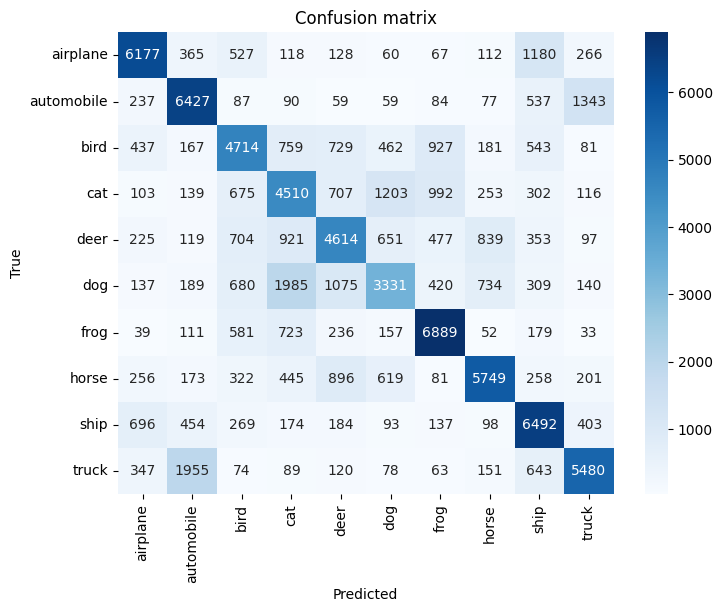

In [11]:
model_info = get_model_info(best_name)
model_info['conf_matrix'][np.argmax(model_info['acc'])]

model_info = get_model_info(best_name)
conf_matrix = model_info['conf_matrix'][np.argmax(model_info['acc'])]

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion matrix')
ax.set_xticks(np.arange(10) + 0.5)
ax.set_xticklabels([labels[i] for i in range(10)], rotation=90)
ax.set_yticks(np.arange(10) + 0.5)
ax.set_yticklabels([labels[i] for i in range(10)], rotation=0)
plt.show()